In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#importação das bibliotecas permitidas

Salvando DataFrame (remoção de linhas duplicadas e preenchimento de linhas vazias)

In [3]:
df = pd.read_csv("googleplaystore.csv", delimiter=",") #salvando arquivo no dataframe separando cada coluna por ","
df = df.drop_duplicates() #remove linhas duplicadas
df = df.fillna(0) #preenche linhas vazias
#df.loc[10473, 'Category'] = None
#código comentado acima não preenchia a coluna faltante corretamento, corrigi o arquivo manualmente após tentativas falhas
df['Installs'] = df['Installs'].str.replace('+', '', regex=False)
#remoção do caractere "+" na coluna 'Installs' para prevenir problemas de conversão de dados

PRIMEIRO GRÁFICO (Gráfico de Barras)

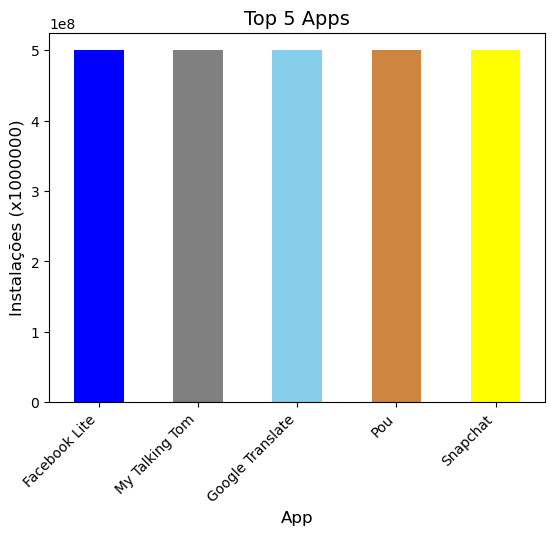

In [4]:
dfSelecionado = df[['Installs', 'App']] #seleção das colunas necessárias
topApps = dfSelecionado.sort_values(by='Installs', ascending=False) #ordenação decrescente do número de intalações
topApps = topApps.head(5) #seleciona apenas os 5 primeiros

topApps['Installs'] = topApps['Installs'].str.replace(',', '') #tira a vírgula para transformar os números em inteiros
topApps['Installs'] = pd.to_numeric(topApps['Installs'], errors='coerce') #transforma em inteiros

cores = ['b', 'gray', 'skyblue', 'peru', 'yellow'] #seleciona as cores para cada barra do gráfico
figura = topApps.plot(kind='bar', x='App', y='Installs', legend=False, color=cores) #cria o gráfico com os dados selecionados anteriromente


#adiciona títulos e rótulos dos eixos
plt.title('Top 5 Apps', fontsize=14)
plt.xlabel('App', fontsize=12)
plt.ylabel('Instalações (x1000000)', fontsize=12)

#ajusta os rótulos do eixo x
plt.xticks(rotation=45, ha='right')

#exibe o gráfico
plt.show()

SEGUNDO GRÁFICO (Gráfico de Pizza)

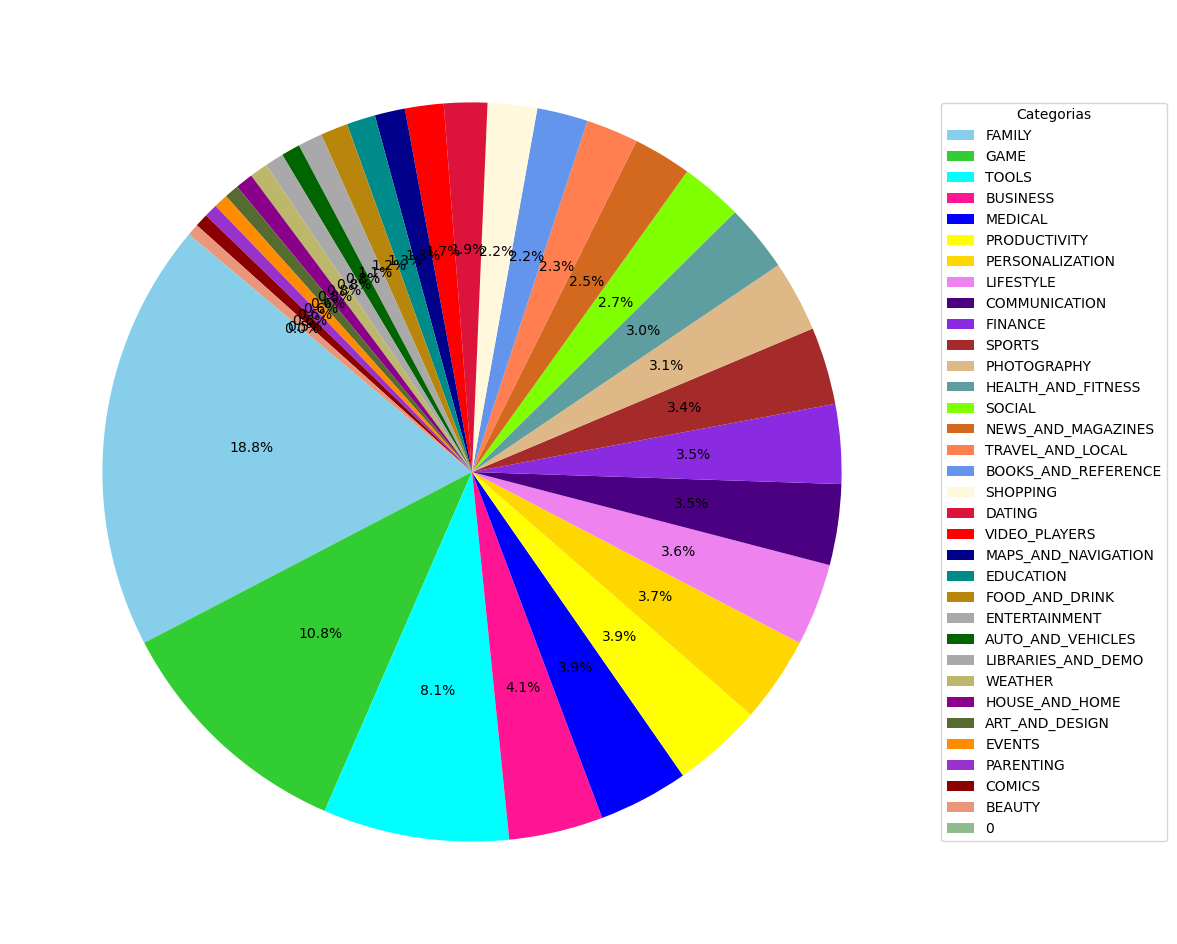

In [5]:
categorias = df['Category'].value_counts() #coluna necessária para a criação do gráfico

#lista com 30 cores nomeadas do Matplotlib
cores = [
    'skyblue',
    'limegreen',
    'aqua',
    'deeppink',
    'b',
    'yellow',
    'gold',
    'violet',
    'indigo',
    'blueviolet',
    'brown',
    'burlywood',
    'cadetblue',
    'chartreuse',
    'chocolate',
    'coral',
    'cornflowerblue',
    'cornsilk',
    'crimson',
    'red',
    'darkblue',
    'darkcyan',
    'darkgoldenrod',
    'darkgray',
    'darkgreen',
    'darkgrey',
    'darkkhaki',
    'darkmagenta',
    'darkolivegreen',
    'darkorange',
    'darkorchid',
    'darkred',
    'darksalmon',
    'darkseagreen',
    'darkslateblue',
    'darkslategray',
    'darkslategrey',
    'darkturquoise',
    'darkviolet'
]
plt.figure(figsize=(16, 12))
plt.pie(categorias, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 10}, colors=cores) #cria o gráfico
plt.legend(categorias.index, title="Categorias", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1)) #cria legendas para o gráfico ficar mais legível
plt.show()



APP MAIS CARO EXISTENTE NO DATASET

In [7]:
#seleciona as colunas necessárias por meio de uma cópia para não gerar células de erro
dfSelecionado = df[['Price', 'App']].copy()

#remove o símbolo '$' da coluna 'Price' para transformas a coluna em float
dfSelecionado.loc[:, 'Price'] = dfSelecionado['Price'].str.replace('$', '', regex=False)

#converte a coluna 'Price' para tipo numérico, tratando erros
dfSelecionado.loc[:, 'Price'] = pd.to_numeric(dfSelecionado['Price'], errors='coerce')

#ordena os valores da coluna 'Price' em ordem decrescente e seleciona o primeiro
topPrice = dfSelecionado.sort_values(by='Price', ascending=False)
topPrice.head(1)


,Price,App
4367,400.0,I'm Rich - Trump Edition


NÚMERO DE APLICATIVOS COM CLASSIFICAÇÃO 'MATURE 17+'

In [8]:
dfSelecionado = df.where(df['Content Rating'].str.contains('Mature 17+', na=False)) #seleciona apenas as linhas solicitadas no df
contador = dfSelecionado['App'].notna().sum() #contagem de linhas com a string 'Mature 17+'
print("Número de aplicativos com classificação 'Mature 17+' = ", contador)

Número de aplicativos com classificação 'Mature 17+' =  447


LISTA TOP 10 REVIEWS

In [9]:
dfSelecionado = df[['App', 'Reviews']].copy() #seleção das colunas necessárias por uma cópia do df
dfSelecionado.loc['Reviews'] = pd.to_numeric(dfSelecionado['Reviews'], errors='coerce') #transforma os números de reviews em int
topReviews = dfSelecionado.sort_values(by='Reviews', ascending=False) #ordem decrescente dos números
topReviews.head(10) #seleção dos 10 primeiros apps

,App,Reviews
2544,Facebook,78158306.0
3943,Facebook,78128208.0
336,WhatsApp Messenger,69119316.0
3904,WhatsApp Messenger,69109672.0
2604,Instagram,66577446.0
2545,Instagram,66577313.0
3909,Instagram,66509917.0
382,Messenger – Text and Video Chat for Free,56646578.0
335,Messenger – Text and Video Chat for Free,56642847.0
1879,Clash of Clans,44893888.0


TERCEIRO GRÁFICO (Gráfico de Linha)

Text(0, 0.5, 'Tamanho (em MB)')

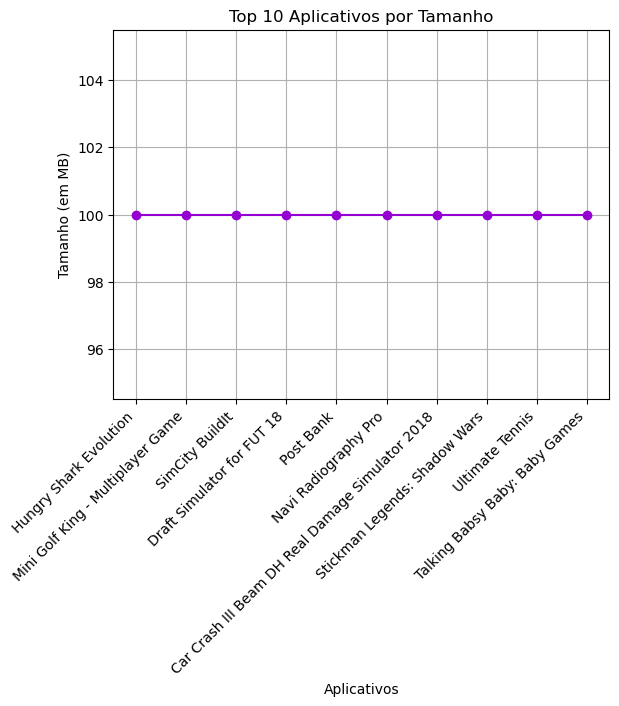

In [10]:
dfSelecionado = df[['App', 'Size']].copy() #seleção das colunas necessárias por uma cópia do df

#remove o sufixo 'M' da coluna 'Size'
dfSelecionado['Size'] = dfSelecionado['Size'].str.replace('M', '', regex=False)

#converte a coluna 'Size' para tipo numérico, tratando erros
dfSelecionado['Size'] = pd.to_numeric(dfSelecionado['Size'], errors='coerce')

topSizes = dfSelecionado.sort_values(by='Size', ascending=False) #ordena os valores da coluna 'Size' em ordem decrescente
topSizes = topSizes.head(10) #seleciona os 10 primeiros

#criação do gráfico
plt.plot(topSizes['App'], topSizes['Size'], marker='o', linestyle='-', color='darkviolet')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

#tratamento do gráfico com definição do título e rótulos
plt.title('Top 10 Aplicativos por Tamanho')
plt.xlabel('Aplicativos')
plt.ylabel('Tamanho (em MB)')

QUARTO GRÁFICO (Gráfico de Dispersão)

Text(0.5, 1.0, 'Top App por Rating')

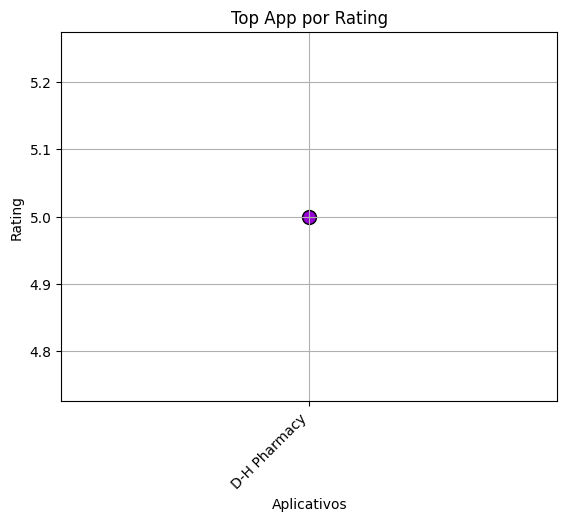

In [19]:
dfSelecionado = df[['App', 'Rating']].copy() ##seleção das colunas necessárias por uma cópia do df
dfSelecionado['Rating'] = pd.to_numeric(dfSelecionado['Rating'], errors='coerce') #transforma a coluna 'Rating' em float
topRatings = dfSelecionado.sort_values(by='Rating', ascending=False) #ordem decrecente dos dados da coluna
topRatings = topRatings.head(1) #seleciona o primeiro (apesar de haver outros com o mesmo rating)

#criação do gráfico 
plt.scatter(topRatings['App'], topRatings['Rating'], color='darkviolet', s=100, edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

#definição de título e rótulos
plt.xlabel('Aplicativos')
plt.ylabel('Rating')
plt.title('Top App por Rating')
